In [542]:
import pandas as pd
import os as o
import re
import matplotlib.dates as mdates



#For Data Visualisation:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

#To override GGplot Style
import warnings
warnings.filterwarnings('ignore')

In [543]:
path = path = 'C:\\Users\\Dell\\Desktop\\Data Analytics\\Python\\Forage Project\\'
o.chdir(path)

In [544]:
o.getcwd()

'C:\\Users\\Dell\\Desktop\\Data Analytics\\Python\\Forage Project'

In [4]:
df = pd.read_excel('./ANZ/ANZ_dataset.xlsx')

In [5]:
df.head(1)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit


In [546]:
#Select Relevant Columns

df2 = df[['status', 'account',
       'long_lat', 'txn_description', 'merchant_id',
       'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat',
       'movement']]

In [547]:
df2.head(2)

,status,account,long_lat,txn_description,merchant_id,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,authorized,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit
1,authorized,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit


In [548]:
#Create a time column from extraction column
#df2.extraction = [" ".join(i.replace('T','_',).split()) for i in df2.extraction]
def cleantime (ct):
    ct = re.sub('T', '_', ct)
    ct = re.sub(':', '_', ct)
    return ct

In [549]:
df2['extraction'] = df2['extraction'].apply(cleantime)

In [550]:
df2['hour'] = df2['extraction'].apply(lambda x: x.split('_')[1])

In [551]:
#Remove CUS from Customer ID
df2['customer_id'] =[" ".join(i.replace('CUS-','',).split()) for i in df2['customer_id']]
df2['account'] =[" ".join(i.replace('ACC-','',).split()) for i in df2['account']]

In [552]:
df2.head(2)

,status,account,long_lat,txn_description,merchant_id,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,hour
0,authorized,1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01_01_01_15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,2487424745,153.38 -27.99,debit,01
1,authorized,1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01_01_13_45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,2487424745,151.21 -33.87,debit,01


In [553]:
df2.hour.unique()

array(['01', '02', '04', '06', '07', '08', '09', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00',
       '03', '05'], dtype=object)

In [554]:
df2 = df2[['status', 'account',
       'long_lat', 'txn_description', 'merchant_id',
       'balance', 'date', 'hour', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat',
       'movement']]

In [555]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   account            12043 non-null  object        
 2   long_lat           12043 non-null  object        
 3   txn_description    12043 non-null  object        
 4   merchant_id        7717 non-null   object        
 5   balance            12043 non-null  float64       
 6   date               12043 non-null  datetime64[ns]
 7   hour               12043 non-null  object        
 8   gender             12043 non-null  object        
 9   age                12043 non-null  int64         
 10  merchant_suburb    7717 non-null   object        
 11  merchant_state     7717 non-null   object        
 12  extraction         12043 non-null  object        
 13  amount             12043 non-null  float64       
 14  transa

In [556]:
df2.describe()

,balance,age,amount
count,12043.000000,12043.000000,12043.000000
mean,14704.195553,30.582330,187.933588
std,31503.722652,10.046343,592.599934
min,0.240000,18.000000,0.100000
25%,3158.585000,22.000000,16.000000
50%,6432.010000,28.000000,29.000000
75%,12465.945000,38.000000,53.655000
max,267128.520000,78.000000,8835.980000


In [557]:
#remove outlier 
df2[df2['balance'] == 267128.520000]
df2 = df2[df2['balance'] != 267128.520000]

In [558]:
#what is the average transaction amount?
avrtransamount = df2['amount'].mean()
avrtransamount

187.76816475668477

In [559]:
transpermonth = df2.groupby(df2['date'].dt.strftime('%B'))['transaction_id'].count()
transpermonth

date
August       3943
October      4086
September    4013
Name: transaction_id, dtype: int64

In [560]:
#Unique transaction per month 
df2.groupby(df2['date'].dt.strftime('%B'))['customer_id'].nunique()
#df2.groupby(df2['date'].dt.strftime('%B'))['customer_id'].agg({'TOT_SALES': 'mean'}).reset_index()

date
August       100
October      100
September    100
Name: customer_id, dtype: int64

In [561]:
#Total amount by date and hour
Custbydateandtime= pd.DataFrame(df2.groupby(['date','hour'])['customer_id'].count())
Custbydateandtime.rename(columns = {'customer_id': 'No of Customer'}, inplace = True)
Custbydateandtime.head()

No of Customer
date       hour                
2018-08-01 01                 5
           02                 2
           04                 2
           06                 4
           07                 3

In [562]:
#Total Sales and customer  per date
salesbydate2 = pd.DataFrame(df2.groupby(['date'])['amount'].agg({'sum', 'count'}))
salesbydate2.index.name = 'Date'
salesbydate2.head()

,sum,count
Date,,
2018-08-01,29867.94,137
2018-08-02,21786.32,152
2018-08-03,38096.58,157
2018-08-04,6296.05,118
2018-08-05,4426.50,100


In [564]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

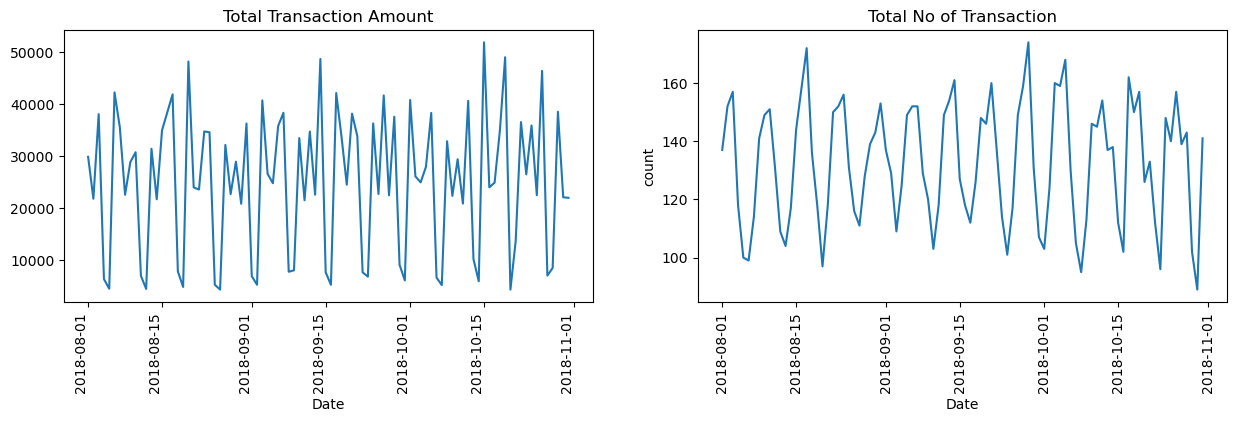

In [565]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
salesbydate2['sum'].plot(ax=ax1)
plt.tick_params(axis='x', rotation=90) 
ax1.set_title('Total Transaction Amount')

ax2=plt.subplot(122)
sns.lineplot(y="count",x=salesbydate2.index, data=salesbydate2)
plt.tick_params(axis='x', rotation=90) 
ax2.set_title('Total No of Transaction')
plt.show()

In [24]:
date = [salesbydate2 for salesbydate2, df in salesbydate2.groupby('Date')]


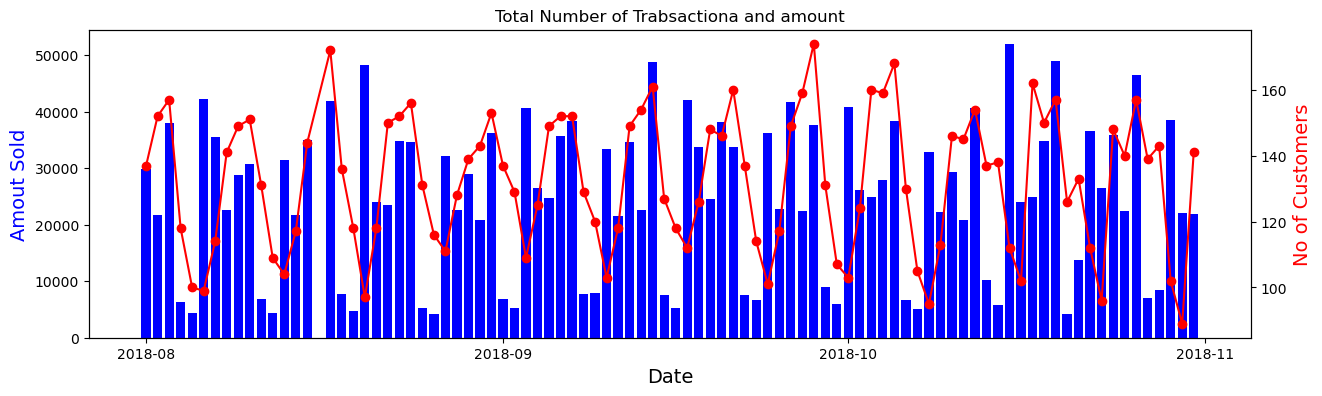

In [566]:
fig,ax = plt.subplots(figsize=(15,4))
ax2=ax.twinx()
ax.bar(date, salesbydate2['sum'], color="blue")
ax2.plot(date, salesbydate2['count'], color="red",marker="o")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Amout Sold",color="blue",fontsize=14)
ax2.set_ylabel("No of Customers",color="red",fontsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_title('Total Number of Trabsactiona and amount')
plt.show()


on most days, more customers doesnt neccessairily guarantee transaction volume

Most productive hours are from 11 to 17

In [103]:
df2.head(3)

,status,account,long_lat,txn_description,merchant_id,balance,date,hour,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,authorized,1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.39,2018-08-01,01,F,26,Ashmore,QLD,2018-08-01_01_01_15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,2487424745,153.38 -27.99,debit
1,authorized,1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.20,2018-08-01,01,F,26,Sydney,NSW,2018-08-01_01_13_45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,2487424745,151.21 -33.87,debit
2,authorized,1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,5.71,2018-08-01,01,M,38,Sydney,NSW,2018-08-01_01_26_15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,2142601169,151.21 -33.87,debit


Transaction by gender

In [94]:
#sns.barplot(y="amount", x="gender", data=df2)
#sns.barplot(y="customer_id", x="gender", data=df2)

In [495]:
Trans_Date = pd.DataFrame(df2.groupby(['date', 'gender'])['amount'].sum().reset_index())
Trans_Date.head()

,date,gender,amount
0,2018-08-01,F,13628.64
1,2018-08-01,M,16239.30
2,2018-08-02,F,5896.25
3,2018-08-02,M,15890.07
4,2018-08-03,F,17091.59


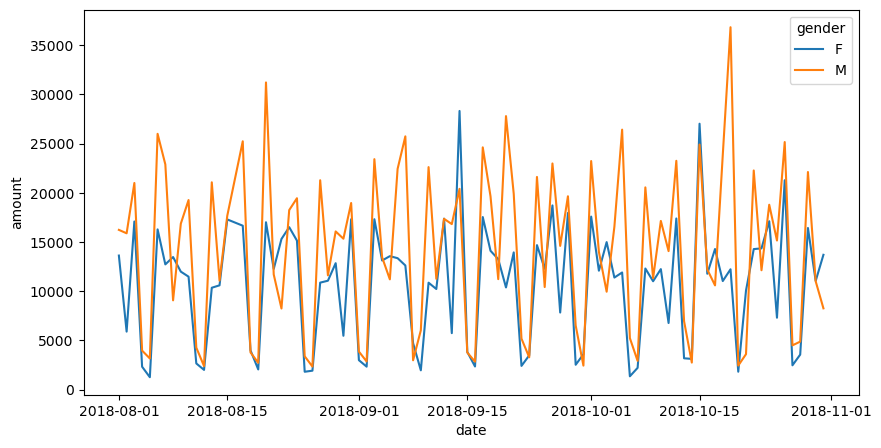

In [567]:
plt.figure(figsize=(10, 5))
sns.lineplot(y="amount",x="date",hue="gender", data=Trans_Date)
plt.show()

Men has more transaction amount than women except in mid September and October 2019 

In [200]:
genderandamt = pd.DataFrame(df2.groupby('gender')['amount'].agg({'mean','count'}))
genderandamt

,count,mean
gender,,
F,5758,168.517303
M,6284,205.407640


<BarContainer object of 2 artists>

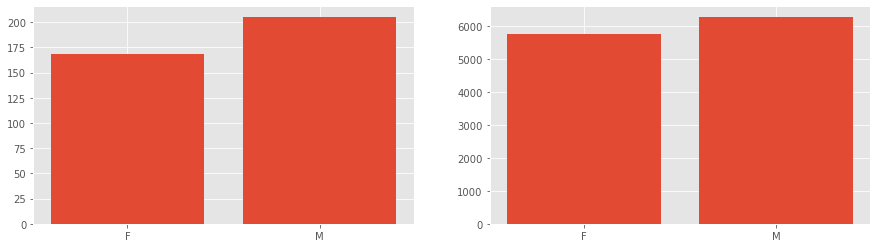

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
plt.bar(genderandsale.index, genderandsale['mean'])

ax2=plt.subplot(122)
plt.bar(genderandsale.index, genderandsale['count'])


In [ ]:
men has more customers than women and have an higher average amount

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
genderandsale['sum'].plot(ax=ax1)


ax2=plt.subplot(122)
sns.lineplot(y="count",x=salesbydate2.index, data=salesbydate2)
plt.tick_params(axis='x', rotation=90) 
ax2.set_title('No of Customer')
plt.show()

In [100]:
Genderandhour = pd.DataFrame(df2.groupby(["gender", "hour"])["amount"].agg(["sum", "count"]))
Genderandhour.head(3)

sum  count
gender hour                
F      00    1630.97     57
       01    3940.58     87
       02    3842.27     68

<AxesSubplot:xlabel='hour', ylabel='sum'>

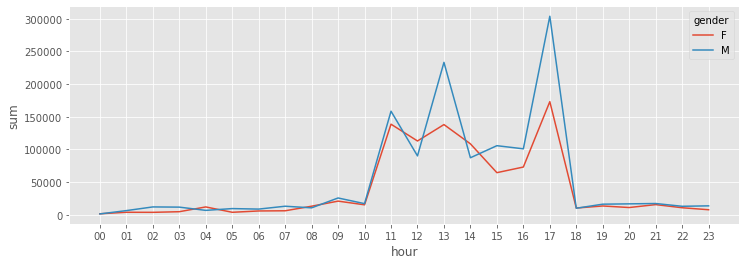

In [107]:
plt.figure(figsize=(12, 4))
sns.lineplot(y="sum",x="hour",hue="gender", data=Genderandhour)

10 am to 18 pm are the most productive hour for the day.

For a challenge – what insights can you draw from the location information provided in the dataset?

### Transaction by state or Location

In [351]:
df2.head(3)

,status,account,long_lat,txn_description,merchant_id,balance,date,hour,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,authorized,1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.39,2018-08-01,01,F,26,Ashmore,QLD,2018-08-01_01_01_15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,2487424745,153.38 -27.99,debit
1,authorized,1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.20,2018-08-01,01,F,26,Sydney,NSW,2018-08-01_01_13_45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,2487424745,151.21 -33.87,debit
2,authorized,1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,5.71,2018-08-01,01,M,38,Sydney,NSW,2018-08-01_01_26_15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,2142601169,151.21 -33.87,debit


In [368]:
mstate = pd.DataFrame(df2.groupby(["merchant_state"])["amount"].sum().reset_index())
mstate

,merchant_state,amount
0,ACT,4876.68
1,NSW,102021.77
2,NT,9168.89
3,QLD,53483.45
4,SA,16776.57
5,TAS,1962.93
6,VIC,87584.00
7,WA,33992.06


<BarContainer object of 8 artists>

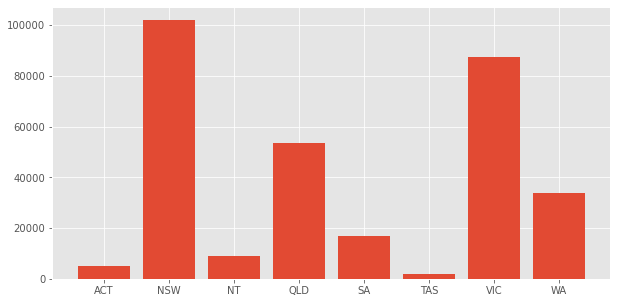

In [534]:
plt.figure(figsize=(10, 5))
plt.bar('merchant_state', 'amount', data =mstate)

VIC and NSW are the two leading states with regards to transaction amount

In [438]:
msubrubhead = pd.DataFrame(df2.groupby(["merchant_suburb"])["amount"].sum().reset_index().sort_values('amount', ascending= False).head(10))
msubrubtails = pd.DataFrame(df2.groupby(["merchant_suburb"])["amount"].sum().reset_index().sort_values('amount', ascending= False).tail(10))

In [439]:
msubrubtails

,merchant_suburb,amount
424,Duaringa,5.04
1431,Tottenham,4.57
788,Larrakeyah,4.56
419,Dover Heights,4.49
877,Marsfield,3.96
615,Hallidays Point,3.86
814,Lindum,3.46
327,Clyde North,2.98
1578,Woombye,2.54
267,Carbrook,2.08


In [441]:
msubrubtails

,merchant_suburb,amount
424,Duaringa,5.04
1431,Tottenham,4.57
788,Larrakeyah,4.56
419,Dover Heights,4.49
877,Marsfield,3.96
615,Hallidays Point,3.86
814,Lindum,3.46
327,Clyde North,2.98
1578,Woombye,2.54
267,Carbrook,2.08


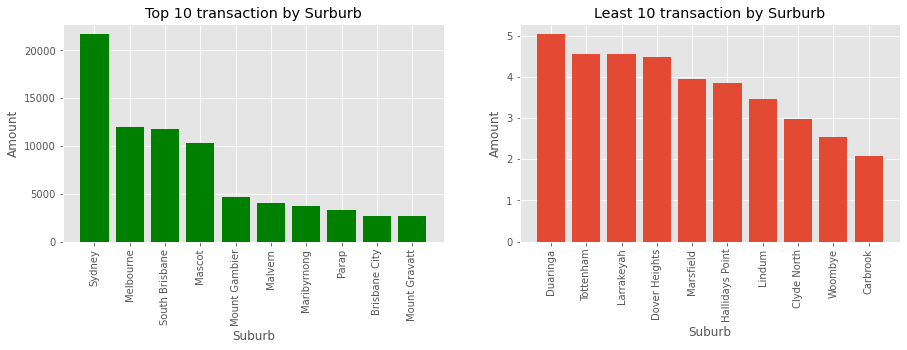

In [448]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
ax1.bar('merchant_suburb', 'amount', color = 'green', data =msubrubhead)
plt.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Amount')
ax1.set_xlabel("Suburb")
ax1.set_title( 'Top 10 transaction by Surburb')

ax2=plt.subplot(122)
plt.bar('merchant_suburb', 'amount', data =msubrubtails)
plt.tick_params(axis='x', rotation=90) 
ax2.set_ylabel('Amount')
ax2.set_xlabel('Suburb')
plt.title('Least 10 transaction by Surburb')
plt.show()


Sydney is the suburb with the largest amount of transaction with Melbourne, South Bri and Mascot following each other closely at a distance second, third and forth respectively. 

In [514]:
state_suburb_head = pd.DataFrame(df2.groupby(["merchant_state", "merchant_suburb"])["amount"].sum().sort_values(ascending=True).head(20))
state_suburb_head.head(2)
state_suburb_tail = pd.DataFrame(df2.groupby(["merchant_state", "merchant_suburb"])["amount"].sum().sort_values(ascending= True).tail(20))
state_suburb_tail.head()

amount
merchant_state merchant_suburb         
NSW            Chatswood        1860.84
               Newtown          1922.39
VIC            South Melbourne  1936.87
QLD            Broadbeach       2003.30
VIC            Abbotsford       2004.29

<AxesSubplot:ylabel='merchant_state,merchant_suburb'>

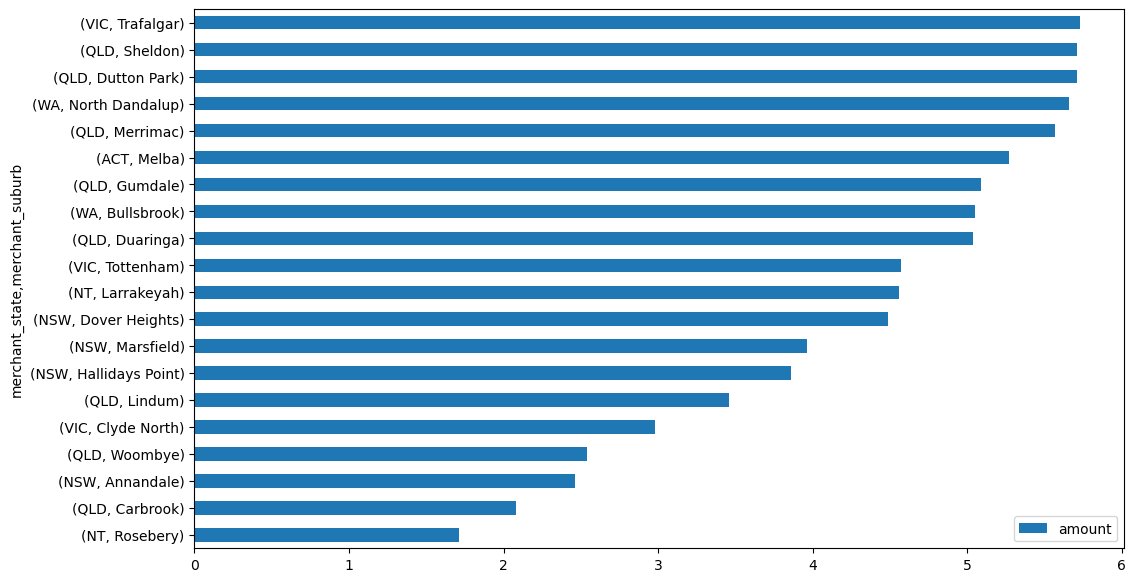

In [568]:
state_suburb_head.plot.barh(figsize=(12,7))

<AxesSubplot:ylabel='merchant_state,merchant_suburb'>

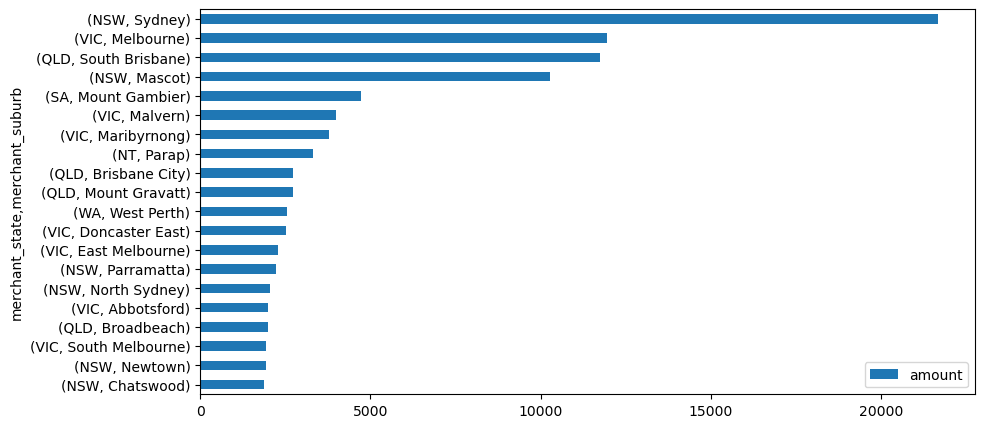

In [569]:
state_suburb_tail.plot.barh(figsize=(10,5))

<AxesSubplot:xlabel='date', ylabel='amount'>

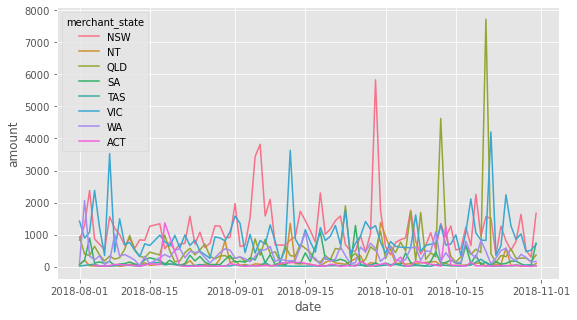

In [183]:
plt.figure(figsize=(9, 5))
sns.lineplot(y="amount",x="date",hue="merchant_state", data=state)

### Mean transaction volume by merchant state

<AxesSubplot:xlabel='date', ylabel='amount'>

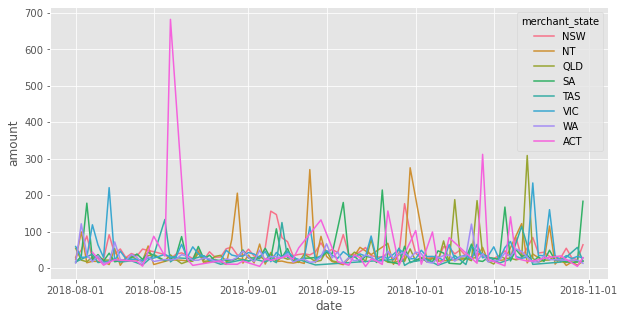

In [181]:
plt.figure(figsize=(10, 5))
sns.lineplot(y="amount", x="date",hue="merchant_state", data=merchant_state_mean)

In [147]:
state_total = df2.groupby(["merchant_state","gender"])["amount"].sum().reset_index()
state_total.head(3)

,merchant_state,gender,amount
0,ACT,F,1657.44
1,ACT,M,3219.24
2,NSW,F,41430.88


<AxesSubplot:xlabel='amount', ylabel='merchant_state'>

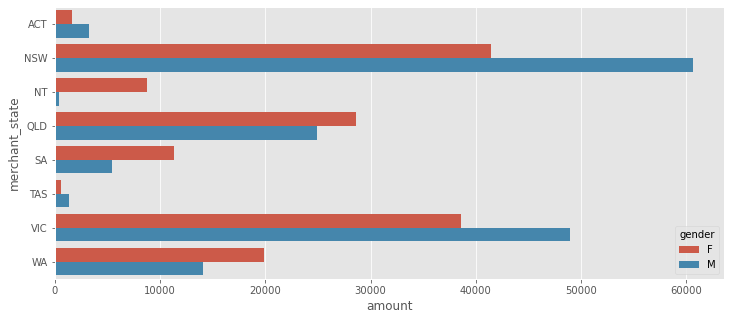

In [152]:
plt.figure(figsize=(12, 5))
sns.barplot(x="amount", y="merchant_state", hue="gender", data=merchant_state_total)

In [184]:
state_hour = df2.groupby(["merchant_state","hour"])["amount"].sum().reset_index()
state_hour.head(3)

,merchant_state,hour,amount
0,ACT,02,7.86
1,ACT,04,21.37
2,ACT,05,133.10


<AxesSubplot:xlabel='hour', ylabel='amount'>

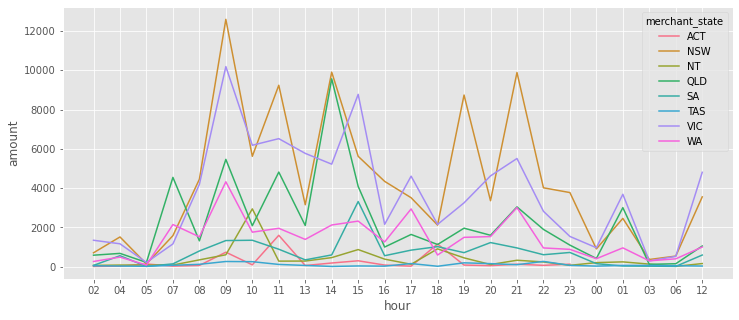

In [190]:
plt.figure(figsize=(12, 5))
sns.lineplot(x="hour", y="amount", hue="merchant_state", data=state_hour)

### Total transaction by age

In [536]:
amount_age = df2.groupby(['age',"gender"])["amount"].sum().reset_index()
amount_age.head()

,age,gender,amount
0,18,F,45124.14
1,18,M,34020.50
2,19,F,84318.80
3,19,M,61733.92
4,20,F,49579.79


In [321]:
tran_type= df.groupby(['movement','gender'])['amount'].sum().reset_index()
tran_type

,movement,gender,amount
0,credit,F,703656.23
1,credit,M,972920.62
2,debit,F,266666.40
3,debit,M,320040.95


In [306]:
tran_type_loc= pd.DataFrame(df.groupby(['movement','merchant_state'])['amount'].sum().reset_index())
tran_type_loc

,movement,merchant_state,amount
0,debit,ACT,4876.68
1,debit,NSW,102021.77
2,debit,NT,9168.89
3,debit,QLD,53483.45
4,debit,SA,16776.57
5,debit,TAS,1962.93
6,debit,VIC,87584.00
7,debit,WA,33992.06


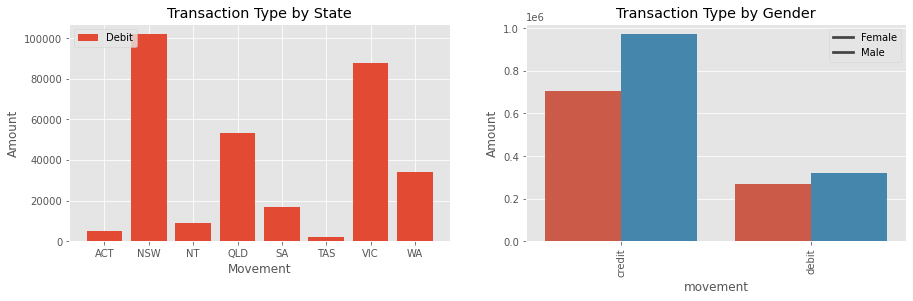

In [341]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
ax1=plt.subplot(121)
plt.bar('merchant_state', 'amount', data =tran_type_loc)
ax1.set_ylabel('Amount')
ax1.set_xlabel("Transaction Type")
ax1.set_title( 'Transaction Type by State')
plt.legend(['Debit', 'Credit'], loc = 2)


ax2=plt.subplot(122)
sns.barplot(y='amount', x='movement', hue= 'gender', data =tran_type )
plt.tick_params(axis='x', rotation=90) 
ax2.set_ylabel('Amount')
ax1.set_xlabel('Movement')
plt.title('Transaction Type by Gender')
plt.legend(['Female', 'Male'])
plt.show()

In [343]:
dc_age_total= df2.groupby(["movement","age"])["amount"].sum().reset_index()
dc_age_total.head()

,movement,age,amount
0,credit,18,59762.72
1,credit,19,115785.36
2,credit,20,84511.81
3,credit,21,107137.60
4,credit,22,81124.69


<AxesSubplot:xlabel='age', ylabel='amount'>

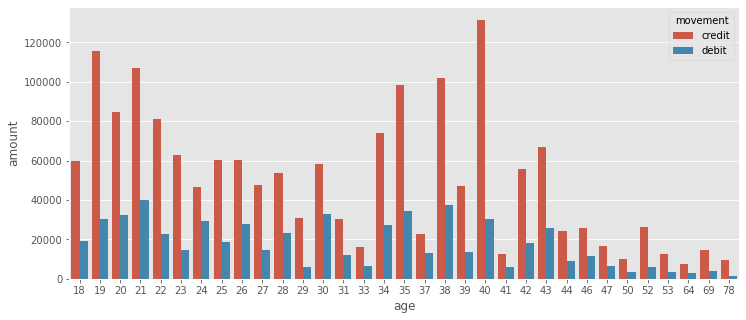

In [346]:
plt.figure(figsize=(12, 5))
sns.barplot(y="amount", x="age", hue="movement", data=dc_age_total)

In [326]:
age_gender= df2.groupby(['age',"gender"])["amount"].sum().reset_index()
age_gender.head()

,age,gender,amount
0,18,F,45124.14
1,18,M,34020.50
2,19,F,84318.80
3,19,M,61733.92
4,20,F,49579.79


<Figure size 1500x500 with 0 Axes>

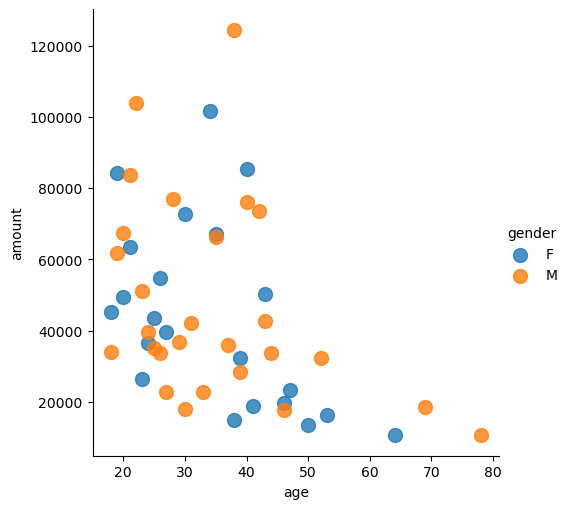

In [570]:
plt.figure(figsize=(15, 5))
sns.lmplot(data= age_gender, y="amount", x="age", hue='gender', fit_reg = False, size=5, scatter_kws = {"s" : 100})
plt.show()